In [8]:
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.image as mpimg
import math

print(tf.__version__)

2.4.1


本文介绍了matplotlib的基础教程。

## 1、基本概念及对象

In [3]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

fig = Figure()
canvas = FigureCanvas(fig)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
line,  = ax.plot([0,1], [0,1])
ax.set_title("a straight line ")
ax.set_xlabel("x label")
ax.set_ylabel("y label")
canvas.print_figure('chatpic1.jpg')


上面这段代码，至少构建了四个对象：fig（Figure 类）、canvas（FigureCanvas 类）、ax（Axes 类）、line（Line2D 类）。
在 Matplotlib 中，整个图像为一个 Figure 对象，在 Figure 对象中可以包含一个或多个 Axes 对象：
* Axes 对象 axes1 都是一个拥有自己坐标系统的绘图区域
* Axes 由 xAxis、yAxis、title、data 构成 
    * xAxis 由 XTick、Ticker 以及 label 构成
    * yAxis 由 YTick、Ticker 以及 label 构成

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])，分别表示：图形区域的左边界距离 figure 左侧 10%，底部 10%，宽度和高度都为整个 figure 宽度和高度的 80%。

canvas 对象，代表真正进行绘图的后端(backend)

## 2、基本用法

### 2.1 画个最简单的图

画一条由10个点组成的折线图

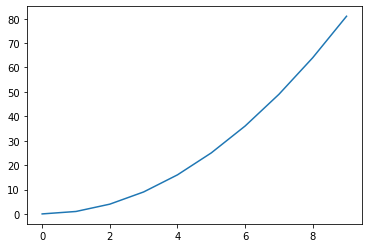

In [3]:


# x = range(10)
# y = [_ ** 2 for _ in x]

x = np.array(range(10))
y = x ** 2

plt.plot(x,y)
plt.show()


### 2.2 线条颜色

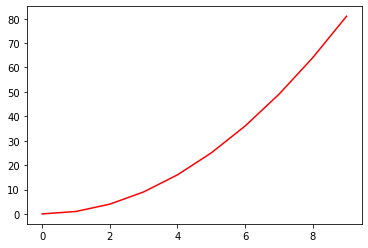

In [4]:
plt.plot(x,y,'r')
plt.show()

### 2.3 线条形状

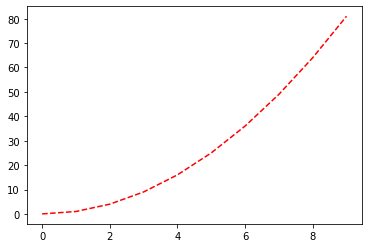

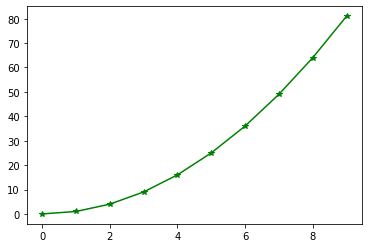

In [5]:
plt.plot(x,y,'r--')
plt.show()

plt.plot(x,y,'g-*')
plt.show()

### 2.4 图形标题&x/y轴名称

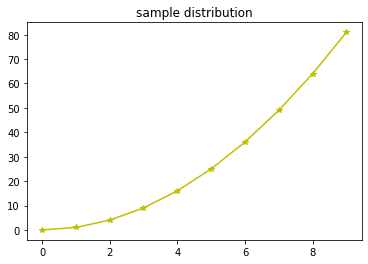

In [9]:
plt.plot(x,y,'y-*')
plt.title('sample distribution')
plt.show()

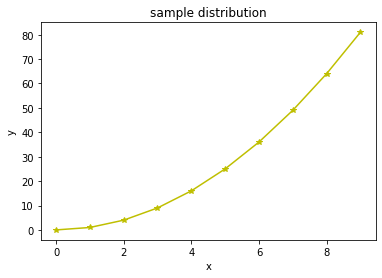

In [10]:
plt.plot(x,y,'y-*')
plt.title('sample distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 2.5 文本

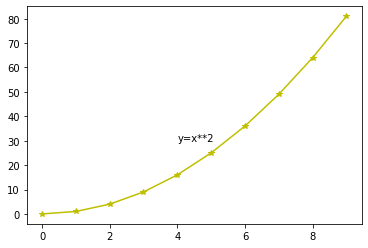

In [13]:
plt.plot(x,y,'y-*')
plt.text(4,30,'y=x**2') ##文本位置以及内容
plt.show()

### 2.6 注解

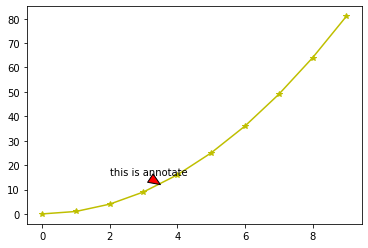

In [14]:
plt.plot(x,y,'y-*')
plt.annotate('this is annotate',xy=(3.5,12),xytext=(2,16),arrowprops={'headwidth':10,'facecolor':'r'})
plt.show()

### 2.7 中文

/Users/ljhn1829/Anocoda/anaconda3/envs/tf2/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26174 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ljhn1829/Anocoda/anaconda3/envs/tf2/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 31034 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ljhn1829/Anocoda/anaconda3/envs/tf2/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ljhn1829/Anocoda/anaconda3/envs/tf2/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ljhn1829/Anocoda/anaconda3/envs/tf2/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26631 missing from current font.
  font.set_text(s, 0.0

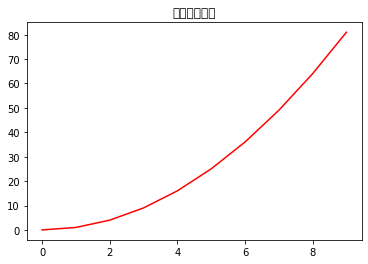

In [16]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 字体有问题
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

plt.plot(x, y, 'r') 
plt.title('显示中文标题')
plt.show()


### 2.8 多线及图例

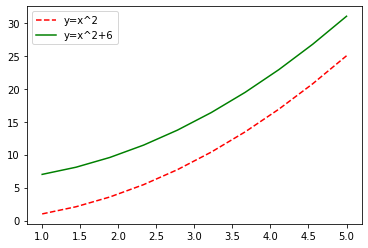

In [11]:
plt.plot(x, y, 'r--') 
plt.plot(x,x**2+6,'g')
plt.legend(['y=x^2','y=x^2+6'])
plt.show() 


### 2.9 网格

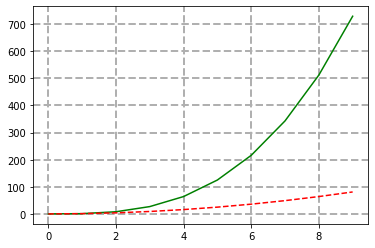

In [22]:
plt.plot(x,y*x,'g')
plt.plot(x,y,'r--')
plt.grid(linestyle='--', linewidth=2)
plt.show()

### 2.10 范围

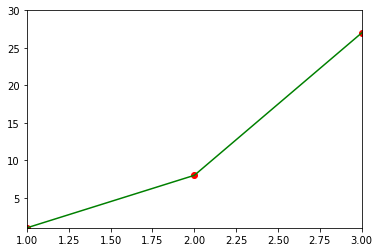

In [23]:
plt.plot(x,x**3,color='g')
plt.scatter(x, x**3,color='r') 
plt.xlim(left=1,right=3)
plt.ylim(bottom=1,top = 30)
plt.show()

### 2.11 日期格式

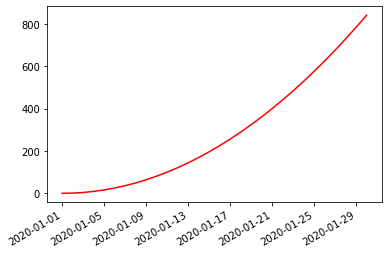

In [25]:
import pandas as pd
x=pd.date_range('2020/01/01',periods=30)
y=np.arange(0,30,1)**2 
plt.plot(x,y,'r')
plt.gcf().autofmt_xdate()
plt.show()

### 2.12 双轴

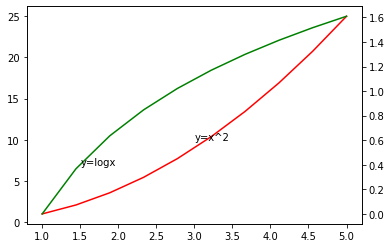

In [26]:
x = np.linspace(1, 5, 10) 
y = x ** 2  

plt.plot(x,y,'r')
plt.text(3,10,'y=x^2')
plt.twinx()
plt.plot(x,np.log(x),'g')
plt.text(1.5,0.4,'y=logx')
plt.show()

### 2.13 多图

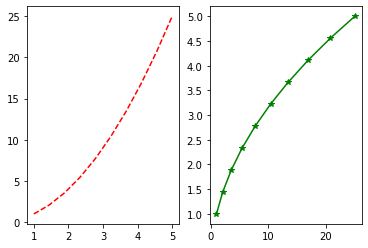

In [27]:
plt.subplot(1,2,1) 
plt.plot(x, y, 'r--') 
plt.subplot(1,2,2) 
plt.plot(y, x, 'g*-') 
plt.show()  

### 2.14 嵌入图

Text(0.5, 1.0, 'insert title')

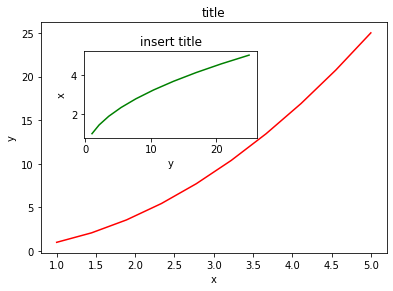

In [28]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # insert axes

# 主图
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# 插入的图
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title')


### 2.15 绘制动画

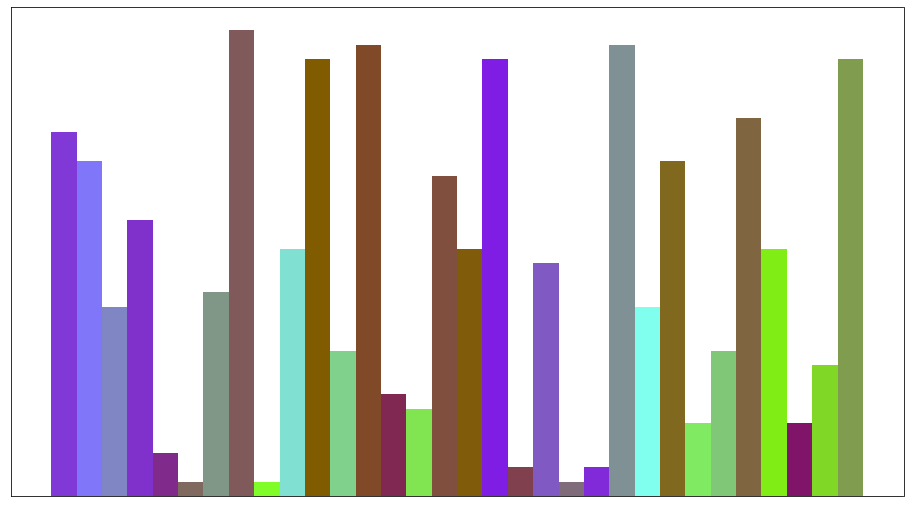

In [32]:
from matplotlib import pyplot as plt
from matplotlib import animation
from random import randint, random

class Data:
    data_count = 32
    frames_count = 2

    def __init__(self, value):
        self.value = value
        self.color = (0.5, random(), random()) #rgb

    # 造数据
    @classmethod
    def create(cls):
        return [[Data(randint(1, cls.data_count)) for _ in range(cls.data_count)]
                for frame_i in range(cls.frames_count)]

def draw_chart():
    fig = plt.figure(1, figsize=(16, 9))
    axs = fig.add_subplot(111)
    axs.set_xticks([])
    axs.set_yticks([])

    # 生成数据
    frames = Data.create()

    def animate(fi):
        axs.cla()  # clear last frame
        axs.set_xticks([])
        axs.set_yticks([])
        return axs.bar(list(range(Data.data_count)),        # X
                       [d.value for d in frames[fi]],       # Y
                       1,                                   # width
                       color=[d.color for d in frames[fi]]  # color
                       )
    # 动画展示
    anim = animation.FuncAnimation(fig, animate, frames=len(frames))
    plt.show()


draw_chart()
 

## 3、高级功能

### 3.1 保存图片

Saving figure 1


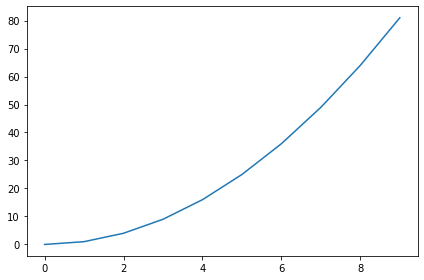

In [38]:
IMAGES_PATH = '.'
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

x = np.array(range(10))
y = x ** 2
plt.plot(x,y)

save_fig('1',True,'jpg',500)

## 3.2 imshow()

使用imshow()可以画一幅图片，常见的用法包括以下几种。

（1）根据二维数组画热图、灰度图
我们取出fashion_mnist的灰度二维数组，然后展示第一幅图片：

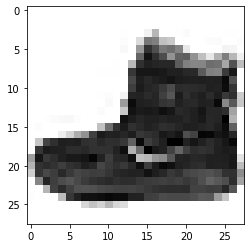

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
plt.imshow(x_train_all[0], cmap='binary')

热图（heatmap）是数据分析的常用方法，通过色差、亮度来展示数据的差异、易于理解。Python在Matplotlib库中，调用imshow()函数实现热图绘制。

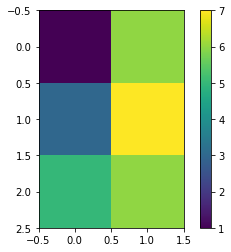

In [7]:
X = [[1, 6], [3, 7], [5, 6]]
plt.imshow(X)
plt.colorbar()
plt.show()

Colormap：参数cmap用于设置热图的Colormap。（参考百度百科）
Colormap是MATLAB里面用来设定和获取当前色图的函数，可以设置如下色图：
    hot 从黑平滑过度到红、橙色和黄色的背景色，然后到白色。
    cool 包含青绿色和品红色的阴影色。从青绿色平滑变化到品红色。
    gray 返回线性灰度色图。
    bone 具有较高的蓝色成分的灰度色图。该色图用于对灰度图添加电子的视图。
    white 全白的单色色图。 
    spring 包含品红和黄的阴影颜色。 
    summer 包含绿和黄的阴影颜色。
    autumn 从红色平滑变化到橙色，然后到黄色。 
    winter 包含蓝和绿的阴影色。


(2)读取一幅png图片，然后修改其内容并展示

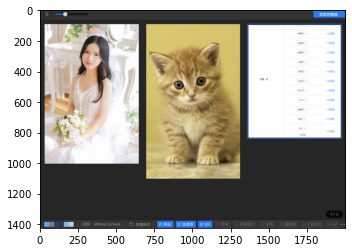

In [6]:
img=mpimg.imread('https://lujinhong-markdown.oss-cn-beijing.aliyuncs.com/md/%E6%88%AA%E5%B1%8F2021-03-04%20%E4%B8%8A%E5%8D%8810.34.16.png')
imgplot = plt.imshow(img)
# plt.show()

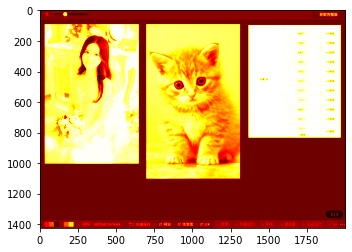

In [7]:
plt.imshow(img[:,:,0], cmap="hot")

## 3.3 多图、子图：subplot与subplots

使用subplot或者subplots可以画多个子图组成的图片。

subplot先指定图片的行列数量以及子图的位置，然后画出对应的图片：

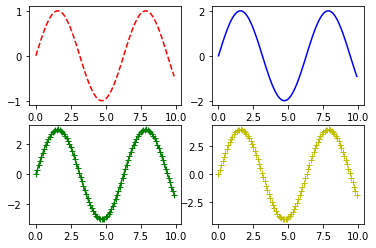

In [27]:
x = np.arange(0,10,0.1)
y = np.sin(x)

# 图片总共有2*2=4幅子图，本图是第1幅
plt.subplot(2,2,1)
plt.plot(x,y,'r--')

# 图片总共有2*2=4幅子图，本图是第2幅
plt.subplot(2,2,2)
plt.plot(x,2*y,'b')

# 图片总共有2*2=4幅子图，本图是第3幅
plt.subplot(2,2,3)
plt.plot(x,3*y,'g-+')

# 图片总共有2*2=4幅子图，本图是第4幅
plt.subplot(2,2,4)
plt.plot(x,4*y,'y+')

plt.show()

使用subplots则是先将画板划分好，然后在一个一个填充子图：

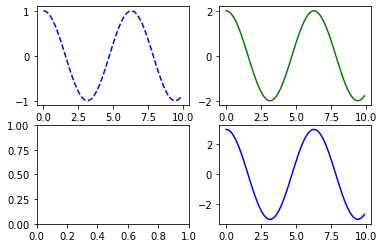

In [30]:
x = np.arange(0,10,0.1)
y = np.cos(x)

fig,ax = plt.subplots(2,2)
ax[0][0].plot(x,y,'b--')
ax[0][1].plot(x,2*y,'g')
ax[1][1].plot(x,3*y,'b')
fig.show()